# Introducción al Aprendizaje Supervisado - Clasificación (Parte I)

* Vista general del Aprendizaje Supervisado
* Problemas de Clasificación
* k-Nearest Neighbor
* Entrenamiento y Test de un modelo


5to año - Ingeniería en Sistemas de Información

UTN - Facultad Regional Villa María

*"We are drowning in information and starving for knowledge."*

                                        –Rutherford D. Roger


## Introducción al Aprendizaje Supervisado

Objetivo de máxima: predecir salidas $y$ a partir de una matriz de entrada $X$. En donde

    
$X = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,p} 
 \end{pmatrix}
$


es una matriz de entradas de orden $n \times p$, donde $n$ es la **cantidad de observaciones** (representando cada fila a una observación individual), mientras que $p$ es la **cantidad de predictores**. En otras palabras, $X$ es una matriz de $n$ entradas donde cada una tiene $p$ predictores. 

Por otra parte,

$y = 
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots  \\
  y_{n}  
 \end{pmatrix}$

es un vector de orden $n \times 1$ que representa las salidas observadas asociadas a cada fila de entradas. De esta manera, $y_i$ es un escalar de salida observada a partir del vector de entrada observada $X_i$, donde

$X_i = 
 \begin{pmatrix}
  x_{i,1} & x_{i,2} & \cdots & x_{i,p}
 \end{pmatrix}$


Ejemplo (reducido a partir de https://archive.ics.uci.edu/ml/datasets/Mushroom):

En base a nuestro (pequeño) conjunto de datos, tenemos que determinar si un hongo es o no venenoso. Contamos con 2 predictores: el predictor 1 es la forma del sombrero del hongo mientras que el predictor 2 es el color del sombrero. Por otra parte, la salida $y_i \in \{venenoso, comestible\}$. Contamos con tres observaciones

$X = 
 \begin{pmatrix}
  \text{convexa} & \text{marrón} \\
  \text{convexa} & \text{blanco} \\
  \text{campana} & \text{blanco} 
 \end{pmatrix}
$


$y = 
 \begin{pmatrix}
  \text{venenoso} \\
  \text{comestible} \\
  \text{comestible}  
 \end{pmatrix}$
 
dado nuestro conjunto de datos, queremos encontrar un modelo que pueda aprender cuándo un hongo es venenoso, para poder **generalizarlo** a hongos no vistos con anterioridad.

Vista general:
    
* Dado un conjunto de datos, existen un conjunto de variables llamado predictores (_**features** / inputs / predictors / independent variables_), los cuales pueden ser medidos.

* Los mismos tienen influencia sobre otro conjunto de una o más variables llamadas variables de respuesta (_**response** / outputs / dependent / target variables_).

* El **objetivo** de este tipo de aprendizaje es utilizar las entradas para poder **predecir** los valores de las variables de respuesta, de modo que nuestras predicciones $\hat{y}$ sean lo más cercana posible a los valores verdaderos observados $y = f(X) + \epsilon$, donde $f(X)$ es la desconocida **función objetivo**.

* En el aprendizaje supervisado, contamos con un dataset $D = \{(X_1,y_1), (X_2,y_2),..., (X_n,y_n)\}$ compuesto tanto por los features de entrada $X \in \mathbb{R}^D$ como por las salidas $y \in \mathbb{R}$ o bien $y \in \{c_1, c_2, ..., c_n\}$ dependiendo de si se trata de un problema de **regresión** o de **clasificación**, respectivamente.

* Se lo considera como supervisado puesto que el agente que aprende cuenta a priori con ejemplos de comportamiento deseado. Tras **entrenar** con tales ejemplos, el agente aprende a generalizar su conocimiento de tal modo de generar buenas predicciones sobre datos no observados.

* A partir de $D$, se distinguen el subconjunto de **datos de entrenamiento**, utilizados para adaptar el modelo y el subconjunto de **datos de test**, empleados para validar la capacidad de generalización del modelo para salidas no utilizadas en el entrenamiento.

![](images/supervised_workflow.svg)

Algunos ejemplos:

* Predecir el riesgo de una determinada enfermedad.
* Identificar una persona en una fotografía.
* Predecir si un correo es o no spam.
* Predecir el costo de una casa en base a sus características.

El aprendizaje supervisado se divide en dos categorías: regresión y clasificación.

* En problemas de regresión, las salidas son variables continuas y ordenadas. En otras palabras, una predicción $y=14.7$ es mayor que una predicción $y=12.5$ (esto no implica que la primera predicción sea más precisa que la segunda).
* En problemas de clasificación, por su parte, las salidas son variables nominales discretas y no ordenadas. Es decir que si las salidas posibles son "rojo" y "naranja", no es posible asumir un orden entre ellas como "rojo" > "naranja".

Para el aprendizaje supervisado, scikit-learn provee la siguiente interfaz común de métodos

>   + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.


## Problemas de Clasificación

* En los problemas de clasificación, la respuesta es **discreta** y **nominal**, en el sentido de que la misma es una categoria $c_i \in \{C_1, C_2, ..., C_n\}$, en donde no podemos asumir en ningún caso que $c_i > c_j$.

* Al no existir un ordenamiento entre las clases, no es posible calcular una distancia entre $y$ e $\hat{y}$, tal como sí es posible en el caso de la regresión. Entonces, medidas como el error cuadrático medio utilizado en la regresión, $$MSE = \frac{1}{n} \sum^{n}_{i=1} (\hat{y}_i - y_i)^2$$ no resultan una buenas para entrenar o evaluar un clasificador.

* Para medir la exactitud de un clasificador, la medida más común es el **error rate**, dado por
$$\frac{1}{n} \sum_{i=1}^n I(y_i \neq \hat{y}_i)$$
donde $I(y_i \neq \hat{y}_i) = 1$ si nuestra predicción difiere de la salida real, mientras que $I(y_i \neq \hat{y}_i) = 0$ si nuestro modelo predijo correctamente la salida para cada observación $i$.

Aclaración sobre la notación utilizada en las clases: el criterio utilizado para los nombres es el de mantener los nombres originales (en inglés) en la medida de lo posible. Esto se debe a que no existe amplia bibliografía en español sobre los temas aquí presentados, por lo tanto preferimos no traducir la mayoría de los términos, puesto que entendemos podría dificultar su posterior consulta en la bibliografía. Para aquellos términos que han sido traducidos, se aclara entre paréntesis su correspondiente término en inglés.

### Bayes classifier

El ideal contra el que se comparan todos los métodos de clasificación es el Bayes Classifier. El mismo asigna a cada observación su clase más probable (_most likely_), según los valores de los predictores. Dado un vector de test $X_0$, el clasificador le asignará la clase $j$ que maximiza

$$P(y=j \mid X=X_0)$$

donde, de acuerdo al Teorema de Bayes,

$$P(y \mid X) = \frac{P(y \cap X)}{P(X)} = \frac{P(y) P(X \mid y)}{P(X)}$$

donde, por su parte: $P(y)$ es la _prior probability_, $P(X \mid y)$ es la _likelihood_ (_posterior probability_) y $P(X)= \sum_{j=1}^C P(y = j)P(X \mid y = j)$ es la _marginal probability_.

De esta manera, si estamos haciendo una predicción binaria (para dos clases) nominales a las cuales llamamos 0 y 1, nuestro predictor seleccionará la clase $0$ si $P(y=0 \mid X=X_0) > 0.5$ y la clase $1$ si $P(y=1 \mid X=X_0) > 0.5$. En el caso de empate, es decir $P(y=0 \mid X=X_0) = P(y=1 \mid X=X_0) = 0.5$, suele optarse por elegir la clase aleatoriamente.

El Bayes classifier produce el menor error rate posible (_bayes error rate_), dado por

$$1 - \mathbb{E}(\max_j P(y=j \mid X))$$

donde $\mathbb{E}$ representa el valor esperado al considerar todos los posibles valores de $X$.

* Notar que Bayes error rate es mayor a 0 debido a factores como por ejemplo a la estocasticidad inherente en algún procedimiento de generación de los datos.

* **¿Qué problemas se les ocurre que tiene el Bayes estimator al pasarlo a la práctica?**

### k Nearest-Neighbors Classifier

Un método muy simple y sin embargo muy efectivo para realizar clasificaciones es KNN: dadas $n$ observaciones en el conjunto de entrenamiento y un punto de test $X_0$, 

$$P(y = j \mid X = X_0) = \frac{1}{k} \sum_{i \in N_0} I(y_i = j)$$

donde $N_0$ es un *neighbourhood* ("vecindario") de $X_0$ representado por los $k$ puntos más cercanos a dicho punto $X_0$.

* kNN es un método **no paramétrico**, en el sentido de que no asume que las muestras proveen de una distribución probabilística parametrizada (por ejemplo con parámetros $\mu$ y $\lambda$).

* kNN también puede utilizarse para regresiones, en donde el valor de salida es un promedio entre los valores de las $k$ observaciones más cercanas.

Vamos a inicializar nuestro entorno de trabajo en el dataset iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors

iris = load_iris()
# tomamos los primeros dos features para mostrarlos mejor gráficamente (el largo y el ancho del sépalo)
# (por eso el iris.data[:, :2])
X = iris.data[:, :2]
y = iris.target

Ahora vamos a graficar los puntos del dataset para el largo y ancho del sépalo

In [5]:
# en primer lugar, vamos a ver las tres salidas posibles y los nombres de los features que elegimos

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# tras esto, vamos a seleccionar todos los puntos asociados a cada una de las salidas.
# Para ello vamos a restringir la matriz de entradas X a cada una de las entradas y
# salidas que nos interesan

# y==0 restringe X a aquellas filas asociadas con la salida 0, mientras que el 0 detrás
# de la "," restringe X a la columna 0
X_setosa_largo_sepalo = X[y==0, 0]
print(X_setosa_largo_sepalo)

[ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.   5.1
  4.8  5.1  4.6  5.3  5. ]


In [13]:
# hacemos esto mismo para las demás combinaciones
X_setosa_ancho_sepalo = X[y==0, 1]
X_virginica_largo_sepalo = X[y==1, 0]
X_virginica_ancho_sepalo = X[y==1, 1]
X_versicolor_largo_sepalo = X[y==2, 0]
X_versicolor_ancho_sepalo = X[y==2, 1]

Para nuestros fines, el módulo *pyplot* de matplotlib funciona (simplificadamente) de la siguiente manera:

1. En las primeras líneas de código se establecen los puntos, líneas o figuras que se desean graficar, como así también pueden establecerse extensiones para el gráfico (por ejemplo, darle un nombre a los ejes). Normalmente sigue el formato

        plt.plot(x, y)
    
    o bien
    
        plt.scatter(x, y)
        
    en donde se determina que se realizará un gráfico tomando en cuenta la posición (x, y).

    Por ejemplo, el código

        plt.scatter(1, 2.5)
        
    indica que se introduce un punto en la posición (1, 2.5) de los ejes cartesianos.

2. El gráfico deja de recibir entradas tras leer la línea "plt.show()", en donde se muestra el gráfico de acuerdo a los puntos, líneas o figuras establecidas anteriormente. 

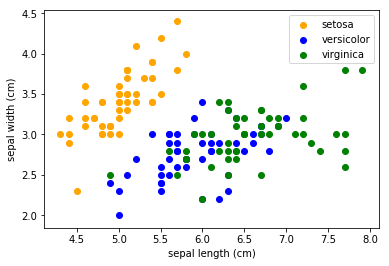

In [15]:
# graficamos de acuerdo a la distribución de los puntos

plt.scatter(X_setosa_largo_sepalo, X_setosa_ancho_sepalo, label=iris.target_names[0], color='orange')
plt.scatter(X_virginica_largo_sepalo, X_virginica_ancho_sepalo, label=iris.target_names[1], color='blue')
plt.scatter(X_versicolor_largo_sepalo, X_versicolor_ancho_sepalo, label=iris.target_names[2], color='green')
plt.xlabel(iris.feature_names[0])  # xlabel le da un nombre al eje de las x
plt.ylabel(iris.feature_names[1])  # ylabel le da un nombre al eje de las y

# legend coloca una caja con las leyendas correspondientes a los puntos del gráfico
plt.legend(loc='best', numpoints=1)

plt.show()

Notar que es también posible graficar utilizando directamente las restricciones sobre la matriz de datos $X$:

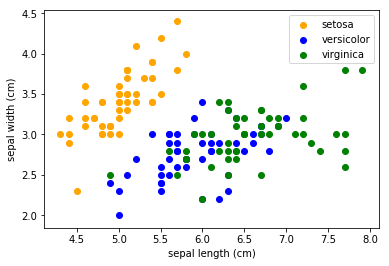

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X[y==1, 0], X[y==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X[y==2, 0], X[y==2, 1], label=iris.target_names[2], color='green')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.legend(loc='best', numpoints=1)

plt.show()

Veamos cómo se ve un clasificador NN artesanal, es decir un KNN donde K=1 (basado en http://cs231n.github.io/classification/). Para ello tenemos que definir, a priori, qué consideramos como distancia entre dos vectores $X_i$ y $X_j$, debido a que los mismos poseen varias columnas (predictores). Para empezar, vamos a utilizar la **distancia L1**, dada por

$$d_{L1}(X_i, X_j) = \sum_p \big| I_{ip} - I_{jp} \big|$$

In [17]:
class ClasificadorNN(object):  # <object> en [...]_NN(object) indica que hereda de la clase object

    # <self> indica referencia a un objeto concreto de la clase
    def __init__(self):
        # inicializamos ambos atributos X e y arbitrariamente
        self.X = []
        self.y = []

    def fit(self, X_train, y_train):
        # para el caso de KNN, nuestro entrenamiento sólo consiste en recordar los datos
        # (X, y) de entrenamiento
        self.X = X_train
        self.y = y_train

    def predict(self, X_test):
        # inicializamos nuestra variable de salida, y_hat, con un tamaño igual a la
        # cantidad de filas
        y_hat = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):  # vamos a iterar sobre todas las filas de datos
            vector_distancia = np.abs(self.X - X_test[i, :])
            suma_distancias = np.sum(vector_distancia, axis=1)
            indice_punto_mas_cercano = np.argmin(suma_distancias)
            y_hat[i] = self.y[indice_punto_mas_cercano]

        return y_hat

Antes de continuar, vamos a dividir nuestro conjunto de datos en entrenamiento y test

![](images/train_test_split.svg)

In [18]:
# Vamos a usar un conjunto de entrenamiento de 70% (105/150) y uno de test de 30% (45/150)

X_train = X[0:105]
X_test = X[105:150]
y_train = y[0:105]
y_test = y[105:150]

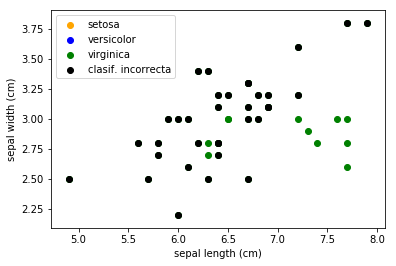

In [19]:
# Instanciamos nuestro clasificador

clf = ClasificadorNN()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


# Graficamos los resultados

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)

plt.show()

In [40]:
# ¿tantos incorrectos?

print('Porcentaje de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))
# estamos obteniendo el porcentaje (o tasa de aciertos) al dividir la cantidad de ocurrencias del
# conjunto y_test en donde los elementos coinciden con y_hat sobre la cantidad de ocurrencias de y_test

Porcentaje de aciertos:  0.7111111111111111


¿Por qué clasifica tan mal?

* Porque estamos tomando los datos de entrenamiento y test con índices arbitrarios, por ejemplo

        y_train = y[0:105]

In [22]:
# veamos más detalladamente...

print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]


In [23]:
print(y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


* Casi no tiene ejemplos de entrenamiento para la clase "virginica", mientras que el conjunto de test abarca toda esa clase...
* Este es un **error grave** al preparar los datos para su entrenamiento en un modelo, porque los datos están previamente ordenados de acuerdo a algún criterio.

¿Solución?

* Mezclar los datos para que su orden sea aleatorio.
* Afortunadamente scikit\_learn nos provee con un método justo para hacer eso...

In [24]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

# vemos los resultados...
print(y_test)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]


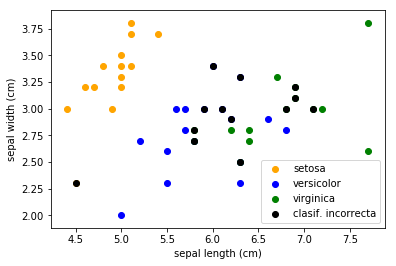

In [25]:
#Probamos nuevamente...
 
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Graficamos los resultados

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)

plt.show()

In [41]:
# veamos ahora...

print('Porcentaje de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))

Porcentaje de aciertos:  0.7111111111111111


scikit-learn ofrece herramientas muy similares al clasificador que implementamos. Veamos cómo podemos implementar un clasificador NN utilizando la librería a alto nivel de scikit-learn.

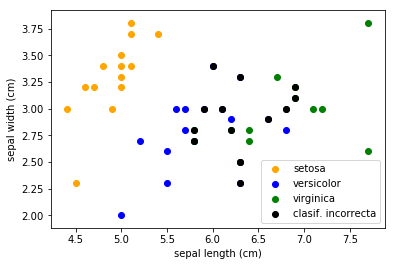

In [26]:
from sklearn import neighbors

# Instanciamos nuestro clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')

clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)

plt.show()

In [30]:
print('Tasa de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))

Tasa de aciertos:  0.7111111111111111


También podemos obtener esta misma tasa a partir de los métodos de scikit-learn, lo cual nos ahorra el tener que hacerlo a mano.

In [39]:
from sklearn.metrics import accuracy_score

print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos:  0.711111111111


#### Ejercicios

**Pendiente de ser definido**


**Fecha de entrega: Pendiente **.

Nota: la resolución de los ejercicios es **individual**. Está permitida la reutilización del código del notebook (por ejemplo para confeccionar gráficos).